# continuous_probabilistic_methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Define a function named get_lower_and_upper_bounds that has two arguments. 
- The first argument is a pandas Series. 
- The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds (col, mult=1.5):
    '''
    This function takes in a Pandas Series and multiplier for the IQR rule.
    It returns a lower bound and an upper bounds as floats.
    '''
    #obtain 25th percentile
    q1 = col.quantile(0.25)
    #obtain 75th percentile
    q3 = col.quantile(0.75)
    # Obtain inter-quartile ragne
    iqr = q3 - q1
    # calculate upper and lower limits
    lower_bound = q1 - mult *iqr
    upper_bound = q3 + mult *iqr

    
    return lower_bound, upper_bound


# ACQUIRE

1.  Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
# Obtain data 
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [5]:
df.shape

(365, 7)

# PREPARE

In [6]:
# The dataset is organized using dates, so it is best to transform it into a datetime index.
df.Date = pd.to_datetime(df.Date)

In [7]:
# set the index to the date time
df = df.set_index('Date')

In [8]:
# The dates are all over the course of one year, so pulling the month may be good for aggregation
df['Month'] = df.index.month_name()

In [9]:
# Verify changes
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


# EXPLORE

Day


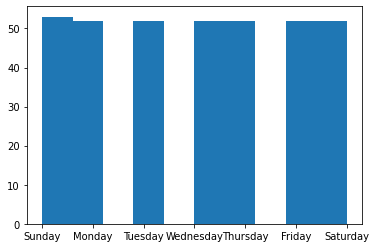

Temperature


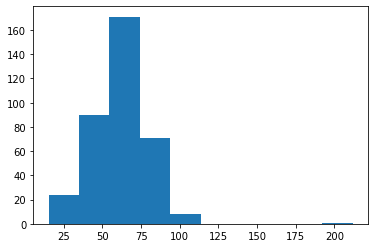

Rainfall


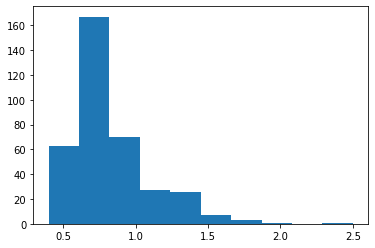

Flyers


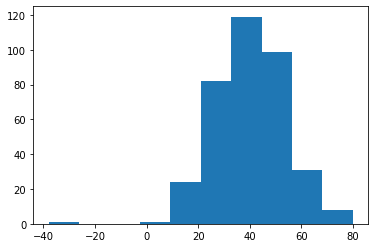

Price


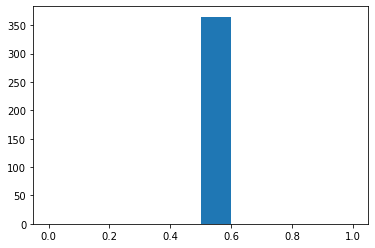

Sales


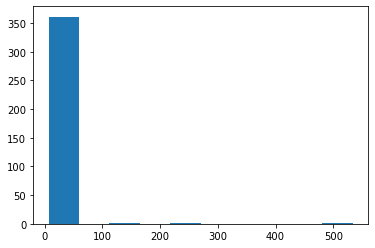

Month


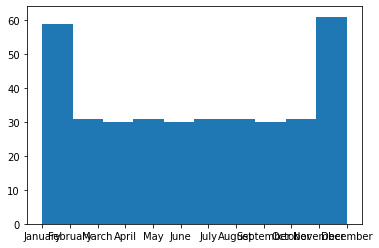

In [10]:
# Univariate Distributions
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

#### Observation 
- Most are normally distributed, with temperature, rainfall, and flyers having potential outliers. A negative number of flyers seems odd, but not impossible if some were ruined. Will investigate each variable further, in isolation.

### Ordinarily we would split the data here, but this is not being done for the purpose of this exercise. 

---

## Anomolies in TEMPERATURE

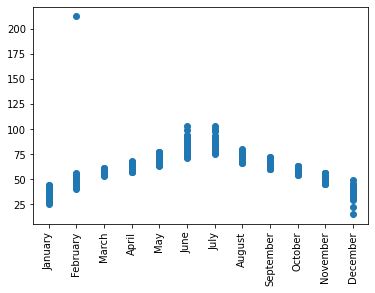

In [11]:
# pinpointed bivariate exploration with scatterplot for continuous variable
plt.scatter(df.Month, df.Temperature)
plt.xticks(rotation=90)
plt.show()

### Observation - Temperature is lowest in the winter months, increases over the spring, is highest in summer, and decreases again in the fall. There may be outliers in January.

In [12]:
# view potential outliers of temperature over 100 degrees
df[df.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-06-26,Monday,102.6,0.47,60,0.5,42,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July


212 degrees for a temperature does not appear reasonable. Perhaps it was a data entry error. Instead of dropping the row, resulting in nulls the value could be corrected to something reasonable, like a temperature near the weekly average or so.

In [13]:
# Veiw termperature around the error date
df.loc['2017-02-05': '2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-05,Sunday,45.4,1.11,32,0.5,18,February
2017-02-06,Monday,45.0,0.95,28,0.5,20,February
2017-02-07,Tuesday,52.3,0.87,39,0.5,21,February
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [14]:
# Average of temperature a few days prior to error
df.loc['2017-02-05': '2017-02-10'].Temperature.mean()

48.0

We will replace the value of 212 with average of the termperature for the week leading up to the error date.

In [15]:
df.loc[df.Temperature == 212, 'Temperature'] = df.loc['2017-02-05': '2017-02-10'].Temperature.mean()

In [16]:
# verify the change
df.loc['2017-02-05': '2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-05,Sunday,45.4,1.11,32,0.5,18,February
2017-02-06,Monday,45.0,0.95,28,0.5,20,February
2017-02-07,Tuesday,52.3,0.87,39,0.5,21,February
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,48.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


---

## Anomolies in RAINFALL

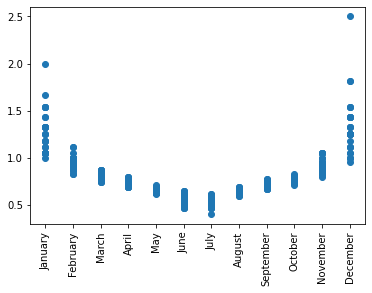

In [17]:
# pinpointed bivariate exploration with scatterplot for continuous variable
plt.scatter(df.Month, df.Rainfall)
plt.xticks(rotation=90)
plt.show()

In [18]:
df.groupby(['Month']).Rainfall.max()

Month
April        0.80
August       0.69
December     2.50
February     1.11
January      2.00
July         0.61
June         0.65
March        0.87
May          0.71
November     1.05
October      0.83
September    0.77
Name: Rainfall, dtype: float64

### Observation 
- Rainfall is higher in the winter months, decreases over the spring, and summer, then starts to increase in the fall. Nothing is too far out of bounds; no overt outliers present.

In [19]:
df[df.Rainfall > 1.5]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January
2017-01-24,Tuesday,28.6,1.54,20,0.5,12,January
2017-12-04,Monday,34.9,1.54,16,0.5,13,December
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December


---

## Anomolies in FLYERS

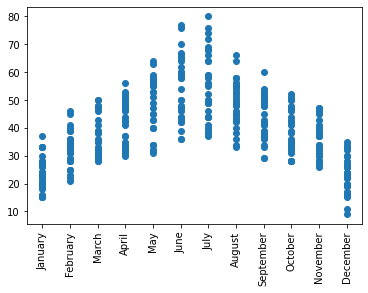

In [38]:
# pinpointed bivariate exploration with scatterplot for continuous variable
plt.scatter(df.Month, df.Flyers)
plt.xticks(rotation=90)
plt.show()

There is one observation that is negative, which seems strange.

In [21]:
# Identify date of strange occurance
df.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

In [22]:
# View the pattern around the strange occurance
df.loc['2017-11-15' : '2017-11-25']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-15,Wednesday,55.9,0.83,47,0.5,23,November
2017-11-16,Thursday,47.3,0.87,28,0.5,21,November
2017-11-17,Friday,46.0,1.00,31,0.5,20,November
2017-11-18,Saturday,48.7,1.05,37,0.5,19,November
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November
2017-11-20,Monday,55.6,0.87,41,0.5,22,November
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November


It seems the negative number could have just been a typo, the addition of a negative sign when one was not needed, so we will make it positive using the absolute value.

In [23]:
# assign absolute value for all values in the Flyer column
df.Flyers = df.Flyers.abs()
# view result of adjustment on entry in question
df.loc['2017-11-21'].Flyers

38

---

## Anomolies in PRICE

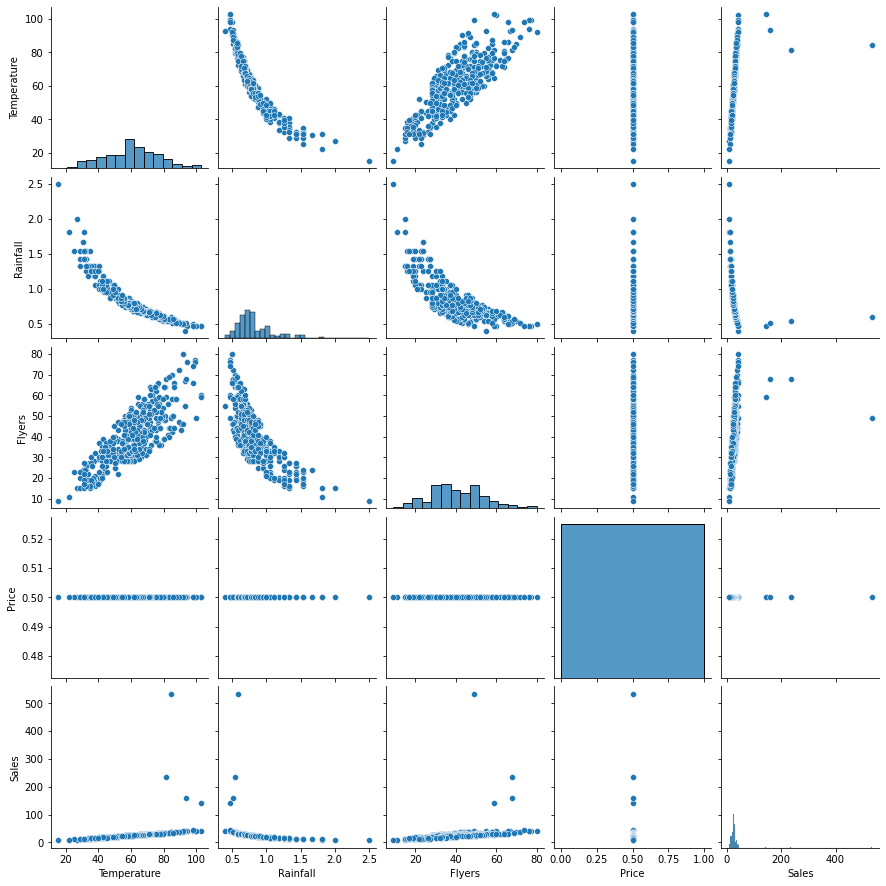

In [24]:
# visualize Distributions and Relationships
sns.pairplot(df)

### QUESTION 1A
- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 

    - Do these lower outliers make sense? 
    - Which outliers should be kept?

In [25]:
df_number_cols = df.select_dtypes(include=['number'])
df_number_cols

,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,
2017-01-01,27.0,2.00,15,0.5,10
2017-01-02,28.9,1.33,15,0.5,13
2017-01-03,34.5,1.33,27,0.5,15
2017-01-04,44.1,1.05,28,0.5,17
2017-01-05,42.4,1.00,33,0.5,18
...,...,...,...,...,...
2017-12-27,42.7,1.00,33,0.5,19
2017-12-28,37.8,1.25,32,0.5,16
2017-12-29,39.5,1.25,17,0.5,15


In [26]:
# create a for loop to iterate through the number columns using the get_lower_and_upper_bounds function
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        # obtain the lower and upper bounds of each column using a print statement
        print(f'{col} lower bound: {lower_bound}')
        print(f'{col} upper bound: {upper_bound}')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass
                                        

Temperature lower bound: 17.30000000000001
Temperature upper bound: 103.69999999999999
-----------------
Rainfall lower bound: 0.26
Rainfall upper bound: 1.3
-----------------
Flyers lower bound: 4.0
Flyers upper bound: 76.0
-----------------
Price lower bound: 0.5
Price upper bound: 0.5
-----------------
Sales lower bound: 5.0
Sales upper bound: 45.0
-----------------


In [29]:
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

### Temperature Outliers

In [28]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December


- Do these lower outliers make sense? 
    - Temperature of 15 degrees in December -> could be reasonable in December
    
- Which outliers should be kept?
    - Temperature of 15 degrees in December -> It would be okay to keep this outlier, having already gotten rid of the 212 (unreasonable) outlier, given 15 degrees in December may just be more extreme than usual, but not unreasonable.
    

### Rainfall Outliers

In [32]:
outliers['Rainfall']['df'].sort_values('Rainfall')

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-29,Sunday,35.2,1.33,27,0.5,14,January
2017-12-21,Thursday,40.5,1.33,23,0.5,15,December
2017-12-17,Sunday,32.2,1.33,16,0.5,14,December
2017-12-12,Tuesday,33.5,1.33,22,0.5,15,December
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-28,Saturday,34.9,1.33,15,0.5,13,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January


- Do these lower outliers make sense? 
    - There are no lower outliers for Rainfall.
    
- Which outliers should be kept?
    - The upper outliers can all be kept because they are consistent and reasonable for the time of year. 

### Flyers Outliers

In [37]:
outliers['Flyers']['df'].sort_values('Flyers')

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-07-14,Friday,92.0,0.50,80,0.5,40,July


In [48]:
df.groupby(['Month']).Flyers.mean()

Month
April        41.966667
August       49.193548
December     23.709677
February     32.428571
January      23.451613
July         54.967742
June         54.100000
March        37.483871
May          48.225806
November     35.633333
October      38.967742
September    43.300000
Name: Flyers, dtype: float64

In [52]:
# View the pattern around the strange occurance
df.loc['2017-06-01' : '2017-07-31'].sort_values('Flyers').tail(20)

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-06-18,Sunday,72.6,0.59,60,0.5,32,June
2017-06-27,Tuesday,75.3,0.63,62,0.5,31,June
2017-07-17,Monday,80.9,0.57,64,0.5,33,July
2017-06-29,Thursday,86.5,0.54,64,0.5,35,June
2017-07-25,Tuesday,79.9,0.57,64,0.5,33,July
2017-06-28,Wednesday,75.9,0.59,65,0.5,33,June
2017-06-13,Tuesday,75.6,0.59,65,0.5,32,June
2017-07-10,Monday,98.0,0.49,66,0.5,40,July
2017-06-19,Monday,86.5,0.56,66,0.5,35,June


- Do these lower outliers make sense? 
    - There are no lower outliers for Flyers.
    
- Which outliers should be kept?
    - The upper outliers can all be kept because they are consistent and reasonable, demonstrating consistently higher numbers in June and July.

### Price Outliers

In [36]:
outliers['Price']['df'].sort_values('Price')

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


- Do these lower outliers make sense? 
    - There are no outliers for price, as it has been a set consistent number across time (0.5).
    
- Which outliers should be kept?
    - N/A

### Sales Outliers

In [53]:
outliers['Sales']['df'].sort_values('Sales')

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


### QUESTION 1B
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. 

- Do these upper outliers make sense? 

- Which outliers should be kept?

### QUESTION 1C
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. 

- Do these lower outliers make sense? 

- Which outliers should be kept?

### QUESTION 1D
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. 

- Do these upper outliers make sense? 
- Which outliers should be kept?

---

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the norm